In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score

import pydotplus
from IPython.display import Image
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [293]:
df = pd.read_csv('./food_price.csv')
df.head()

REF_DATE     GEO           DGUID Commodity groups              UOM  UOM_ID  \
0  2007-01  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
1  2007-02  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
2  2007-03  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
3  2007-04  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   
4  2007-05  Canada  2016A000011124     Grains [A11]  Index, 2007=100     181   

  SCALAR_FACTOR  SCALAR_ID     VECTOR  COORDINATE  VALUE  STATUS  SYMBOL  \
0         units          0  v66449854         1.3   77.4     NaN     NaN   
1         units          0  v66449854         1.3   78.3     NaN     NaN   
2         units          0  v66449854         1.3   80.6     NaN     NaN   
3         units          0  v66449854         1.3   79.0     NaN     NaN   
4         units          0  v66449854         1.3   78.6     NaN     NaN   

   TERMINATED  DECIMALS  
0         NaN         1  
1         NaN         1  
2         NaN         1  
3         NaN         1  
4         NaN         1

In [294]:


# Load the CSV files into Pandas DataFrames
df1 = pd.read_csv('./food_price.csv')
df2 = pd.read_csv('./consumer_price_index_energy.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Energy'})
df3 = pd.read_csv('./consumer_price_index_mort_int.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Mortgage_and_Interest'})
df4 = pd.read_csv('./consumer_price_index_food.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Food'})
df5 = pd.read_csv('./consumer_price_index_gasoline.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Gasoline'})
df6 = pd.read_csv('./consumer_price_index_shelter.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'Shelter'})
df7 = pd.read_csv('./consumer_price_index_all_items.csv')[['REF_DATE', 'VALUE']].rename(columns={'VALUE': 'All_Items'})

# Merge the DataFrames based on the 'REF_DATE' column
df_food_price = pd.merge(df1, df2, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df3, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df4, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df5, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df6, on='REF_DATE', how='left')
df_food_price = pd.merge(df_food_price, df7, on='REF_DATE', how='left')

# Print the merged DataFrame
df_food_price


REF_DATE             GEO           DGUID        Commodity groups  \
0      2007-01          Canada  2016A000011124            Grains [A11]   
1      2007-01          Canada  2016A000011124            Grains [A11]   
2      2007-01          Canada  2016A000011124            Grains [A11]   
3      2007-01          Canada  2016A000011124            Grains [A11]   
4      2007-01          Canada  2016A000011124            Grains [A11]   
...        ...             ...             ...                     ...   
88123  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88124  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88125  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88126  2023-12  Western Canada             NaN  Unprocessed milk [A25]   
88127  2023-12  Western Canada             NaN  Unprocessed milk [A25]   

                   UOM  UOM_ID SCALAR_FACTOR  SCALAR_ID     VECTOR  \
0      Index, 2007=100     181         units          0  v66449854   
1      Index, 2007=100     181         units          0  v66449854   
2      Index, 2007=100     181         units          0  v66449854   
3      Index, 2007=100     181         units          0  v66449854   
4      Index, 2007=100     181         units          0  v66449854   
...                ...     ...           ...        ...        ...   
88123  Index, 2007=100     181         units          0  v66449969   
88124  Index, 2007=100     181         units          0  v66449969   
88125  Index, 2007=100     181         units          0  v66449969   
88126  Index, 2007=100     181         units          0  v66449969   
88127  Index, 2007=100     181         units          0  v66449969   

       COORDINATE  ...  STATUS  SYMBOL  TERMINATED  DECIMALS  Energy  \
0            1.30  ...     NaN     NaN         NaN         1   125.2   
1            1.30  ...     NaN     NaN         NaN         1   125.2   
2            1.30  ...     NaN     NaN         NaN         1   125.2   
3            1.30  ...     NaN     NaN         NaN         1   125.2   
4            1.30  ...     NaN     NaN         NaN         1   125.2   
...           ...  ...     ...     ...         ...       ...     ...   
88123        9.14  ...     NaN     NaN         NaN         1   197.0   
88124        9.14  ...     NaN     NaN         NaN         1   197.0   
88125        9.14  ...     NaN     NaN         NaN         1   197.0   
88126        9.14  ...     NaN     NaN         NaN         1   197.0   
88127        9.14  ...     NaN     NaN         NaN         1   197.0   

       Mortgage_and_Interest   Food  Gasoline  Shelter  All_Items  
0                       -0.3  110.9     126.4    114.8      109.4  
1                       -0.3  110.9     126.4    114.8      110.9  
2                       -0.3  110.9     126.4    114.8      114.8  
3                       -0.3  110.9     126.4    114.8      102.4  
4                       -0.3  110.9     126.4    114.8       94.2  
...                      ...    ...       ...      ...        ...  
88123                   -0.4  186.8     211.3    177.8      155.2  
88124                   -0.4  186.8     211.3    177.8      156.3  
88125                   -0.4  186.8     211.3    177.8      197.0  
88126                   -0.4  186.8     211.3    177.8      143.1  
88127                   -0.4  186.8     211.3    177.8      173.1  

[88128 rows x 21 columns]

In [295]:
df_food_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REF_DATE               88128 non-null  object 
 1   GEO                    88128 non-null  object 
 2   DGUID                  29376 non-null  object 
 3   Commodity groups       88128 non-null  object 
 4   UOM                    88128 non-null  object 
 5   UOM_ID                 88128 non-null  int64  
 6   SCALAR_FACTOR          88128 non-null  object 
 7   SCALAR_ID              88128 non-null  int64  
 8   VECTOR                 88128 non-null  object 
 9   COORDINATE             88128 non-null  float64
 10  VALUE                  88128 non-null  float64
 11  STATUS                 0 non-null      float64
 12  SYMBOL                 0 non-null      float64
 13  TERMINATED             0 non-null      float64
 14  DECIMALS               88128 non-null  int64  
 15  En

In [296]:
df_food_price.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Commodity groups', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS', 'Energy', 'Mortgage_and_Interest',
       'Food', 'Gasoline', 'Shelter', 'All_Items'],
      dtype='object')

# Preparing and Cleaning Data

In our dataset cirtain columns do not provide valuable information for analysis, 
consider removing  columns like  'DGUID', 'UOM', 'UOM_ID','SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', and 'DECIMALS' may not be relevant for analysis.

In [297]:
columns_to_drop = ['DGUID', 'SCALAR_FACTOR', 'UOM', 'UOM_ID', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
df_food_price = df_food_price.drop(columns=columns_to_drop, axis=1)
df_food_price.head()

REF_DATE     GEO Commodity groups  VALUE  Energy  Mortgage_and_Interest  \
0  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
1  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
2  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
3  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   
4  2007-01  Canada     Grains [A11]   77.4   125.2                   -0.3   

    Food  Gasoline  Shelter  All_Items  
0  110.9     126.4    114.8      109.4  
1  110.9     126.4    114.8      110.9  
2  110.9     126.4    114.8      114.8  
3  110.9     126.4    114.8      102.4  
4  110.9     126.4    114.8       94.2

In [298]:
df_food_price.columns

Index(['REF_DATE', 'GEO', 'Commodity groups', 'VALUE', 'Energy',
       'Mortgage_and_Interest', 'Food', 'Gasoline', 'Shelter', 'All_Items'],
      dtype='object')

In [299]:
# Convert 'REF_DATE' column to datetime format
df_food_price['REF_DATE'] = pd.to_datetime(df_food_price['REF_DATE'])

# Extract year and month as separate numerical features
df_food_price['Year'] = df_food_price['REF_DATE'].dt.year
df_food_price['Month'] = df_food_price['REF_DATE'].dt.month

# Drop the original 'REF_DATE' column
df_food_price.drop('REF_DATE', axis=1, inplace=True)


In [300]:


df_food_price.head()


GEO Commodity groups  VALUE  Energy  Mortgage_and_Interest   Food  \
0  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
1  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
2  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
3  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   
4  Canada     Grains [A11]   77.4   125.2                   -0.3  110.9   

   Gasoline  Shelter  All_Items  Year  Month  
0     126.4    114.8      109.4  2007      1  
1     126.4    114.8      110.9  2007      1  
2     126.4    114.8      114.8  2007      1  
3     126.4    114.8      102.4  2007      1  
4     126.4    114.8       94.2  2007      1

In [301]:
# Convert all column names to lowercase
df_food_price.columns = df_food_price.columns.str.lower().str.replace(' ', '_')

# Print the DataFrame to verify the changes
df_food_price


geo        commodity_groups  value  energy  \
0              Canada            Grains [A11]   77.4   125.2   
1              Canada            Grains [A11]   77.4   125.2   
2              Canada            Grains [A11]   77.4   125.2   
3              Canada            Grains [A11]   77.4   125.2   
4              Canada            Grains [A11]   77.4   125.2   
...               ...                     ...    ...     ...   
88123  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88124  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88125  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88126  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88127  Western Canada  Unprocessed milk [A25]  140.8   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
0                       -0.3  110.9     126.4    114.8      109.4  2007      1  
1                       -0.3  110.9     126.4    114.8      110.9  2007      1  
2                       -0.3  110.9     126.4    114.8      114.8  2007      1  
3                       -0.3  110.9     126.4    114.8      102.4  2007      1  
4                       -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
88123                   -0.4  186.8     211.3    177.8      155.2  2023     12  
88124                   -0.4  186.8     211.3    177.8      156.3  2023     12  
88125                   -0.4  186.8     211.3    177.8      197.0  2023     12  
88126                   -0.4  186.8     211.3    177.8      143.1  2023     12  
88127                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[88128 rows x 11 columns]

In [302]:
df_food_price.columns

Index(['geo', 'commodity_groups', 'value', 'energy', 'mortgage_and_interest',
       'food', 'gasoline', 'shelter', 'all_items', 'year', 'month'],
      dtype='object')

In [303]:
df_food_price['commodity_groups'].unique()

array(['Grains [A11]', 'Oilseeds [A12]', 'Specialty crops [A13]',
       'Fresh fruit [A14]',
       'Fresh vegetables (except potatoes and pulse crops) [A15]',
       'Fresh potatoes [A16]', 'Eggs in shell [A24]',
       'Unprocessed milk [A25]'], dtype=object)

In [304]:
df_food_price['geo'].unique()

array(['Canada', 'Eastern Canada', 'Western Canada'], dtype=object)

In [305]:
df_food_price.describe()

value        energy  mortgage_and_interest          food  \
count  88128.000000  88128.000000           88128.000000  88128.000000   
mean     133.539073    158.858333              -1.057353    140.400000   
std       31.643189     22.855669               0.690056     18.742854   
min       55.300000    123.000000              -2.500000    110.700000   
25%      110.075000    145.775000              -1.600000    127.125000   
50%      127.400000    156.050000              -1.200000    140.350000   
75%      148.425000    164.475000              -0.575000    151.100000   
max      295.700000    242.500000               0.400000    186.800000   

           gasoline       shelter     all_items          year         month  
count  88128.000000  88128.000000  88128.000000  88128.000000  88128.000000  
mean     173.386765    136.813725    131.262391   2015.000000      6.500000  
std       31.694287     14.934261     23.254276      4.899007      3.452072  
min      111.300000    114.800000     87.900000   2007.000000      1.000000  
25%      149.825000    125.050000    116.300000   2011.000000      3.750000  
50%      170.100000    133.650000    127.050000   2015.000000      6.500000  
75%      188.575000    145.000000    142.025000   2019.000000      9.250000  
max      299.400000    177.800000    299.400000   2023.000000     12.000000

In [306]:
df_food_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88128 entries, 0 to 88127
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   geo                    88128 non-null  object 
 1   commodity_groups       88128 non-null  object 
 2   value                  88128 non-null  float64
 3   energy                 88128 non-null  float64
 4   mortgage_and_interest  88128 non-null  float64
 5   food                   88128 non-null  float64
 6   gasoline               88128 non-null  float64
 7   shelter                88128 non-null  float64
 8   all_items              88128 non-null  float64
 9   year                   88128 non-null  int32  
 10  month                  88128 non-null  int32  
dtypes: float64(7), int32(2), object(2)
memory usage: 6.7+ MB


In [307]:
import pandas as pd
import plotly.express as px

# List of selected food categories
selected_categories = ['Fresh fruit [A14]', 'Eggs in shell [A24]']

# Create an empty list to store filtered data
filtered_data_list = []

# Iterate over each selected food category
for category in selected_categories:
    # Filter the DataFrame for the current food category
    df_category = df_food_price[df_food_price['commodity_groups'] == category]
    
    # Append filtered data to the list
    filtered_data_list.append(df_category)

# Concatenate the filtered DataFrames
filtered_data = pd.concat(filtered_data_list)

# Sort the DataFrame by 'year' and 'month' columns
filtered_data = filtered_data.sort_values(by=['year', 'month'])

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(filtered_data, x='year', y='value', color='commodity_groups', 
                 labels={'value': 'Price', 'year': 'Year', 'commodity_groups': 'Commodity Group'},
                 title='Prices Over Time for Selected Food Categories',
                 animation_frame='month',  # Include month as animation frame
                 range_x=[df_food_price['year'].min(), df_food_price['year'].max()])  # Set x-axis range to cover all years in the data
fig.show()


In [308]:
import pandas as pd
import plotly.express as px

# Create an empty list to store filtered data
filtered_data_list = []

# Iterate over each commodity group
for category in df_food_price['commodity_groups'].unique():
    # Filter the DataFrame for the current commodity group
    df_category = df_food_price[df_food_price['commodity_groups'] == category]
    
    # Append filtered data to the list
    filtered_data_list.append(df_category)

# Concatenate the filtered DataFrames
filtered_data = pd.concat(filtered_data_list)

# Sort the DataFrame by 'year' and 'month' columns
filtered_data = filtered_data.sort_values(by=['year', 'month'])

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(filtered_data, x='year', y='value', color='commodity_groups', 
                 labels={'value': 'Price', 'year': 'Year', 'commodity_groups': 'Commodity Group'},
                 title='Prices Over Time for All Commodity Groups',
                 animation_frame='month',  # Include month as animation frame
                 range_x=[df_food_price['year'].min(), df_food_price['year'].max()])  # Set x-axis range to cover all years in the data
fig.show()


Suggestions for features:

As for the target variable (dependent variable), we want to predict the 'value' column, which represents the commodity price.

    Feature 1: GEO: Geographic location can significantly influence food prices due to variations
in climate, soil fertility, transportation costs, and market demand. We encoded
the geographical regions  where the data was collected as categorical variables (Western Region, Eastern Region)
    Feature 2: Energy Prices (Energy) Energy prices may affect food production and transportation costs, thus influencing food prices.
    Feature 3: Mortgage and Interest Rates (Mortgage_and_Interest): Mortgage and interest rates can impact consumer spending power and overall economic conditions, which may affect food demand and prices.
    Feature 4: Gasoline Prices (Gasoline) Gasoline prices can influence transportation costs for food distribution, potentially affecting food prices.
    Feature 5: Shelter Costs (Shelter) Shelter costs, including rent and housing prices, may affect household budgets and discretionary spending on food.
    Feature 6: Overall Consumer Price Index (All_Items) The overall Consumer Price Index reflects general inflation trends, which can impact food prices along with other goods and services.
    Feature 7: Month Time-related variables such as year and month can capture seasonal or temporal patterns in food prices, such as fluctuations due to harvest seasons or holidays. We can encode
the months as categorical variables (e.g., January, February, ..., December) or
use numerical representations (e.g., 1 for January, 2 for February, etc.) to account for seasonal effects.
    Feature 8: Yearly trends can reflect broader economic conditions, policy changes, technological
advancements, and global market dynamics that affect food prices.

In [309]:
# Print the DataFrame to verify the changes
df_food_price

geo        commodity_groups  value  energy  \
0              Canada            Grains [A11]   77.4   125.2   
1              Canada            Grains [A11]   77.4   125.2   
2              Canada            Grains [A11]   77.4   125.2   
3              Canada            Grains [A11]   77.4   125.2   
4              Canada            Grains [A11]   77.4   125.2   
...               ...                     ...    ...     ...   
88123  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88124  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88125  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88126  Western Canada  Unprocessed milk [A25]  140.8   197.0   
88127  Western Canada  Unprocessed milk [A25]  140.8   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
0                       -0.3  110.9     126.4    114.8      109.4  2007      1  
1                       -0.3  110.9     126.4    114.8      110.9  2007      1  
2                       -0.3  110.9     126.4    114.8      114.8  2007      1  
3                       -0.3  110.9     126.4    114.8      102.4  2007      1  
4                       -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
88123                   -0.4  186.8     211.3    177.8      155.2  2023     12  
88124                   -0.4  186.8     211.3    177.8      156.3  2023     12  
88125                   -0.4  186.8     211.3    177.8      197.0  2023     12  
88126                   -0.4  186.8     211.3    177.8      143.1  2023     12  
88127                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[88128 rows x 11 columns]

In [310]:
# Filter the DataFrame for the specified commodity groups
selected_commodity_groups = ['Fresh fruit [A14]', 'Eggs in shell [A24]']
filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]

# Display the filtered DataFrame
filtered_df


geo     commodity_groups  value  energy  \
11016          Canada    Fresh fruit [A14]  103.0   125.2   
11017          Canada    Fresh fruit [A14]  103.0   125.2   
11018          Canada    Fresh fruit [A14]  103.0   125.2   
11019          Canada    Fresh fruit [A14]  103.0   125.2   
11020          Canada    Fresh fruit [A14]  103.0   125.2   
...               ...                  ...    ...     ...   
84451  Western Canada  Eggs in shell [A24]  221.6   197.0   
84452  Western Canada  Eggs in shell [A24]  221.6   197.0   
84453  Western Canada  Eggs in shell [A24]  221.6   197.0   
84454  Western Canada  Eggs in shell [A24]  221.6   197.0   
84455  Western Canada  Eggs in shell [A24]  221.6   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
11016                   -0.3  110.9     126.4    114.8      109.4  2007      1  
11017                   -0.3  110.9     126.4    114.8      110.9  2007      1  
11018                   -0.3  110.9     126.4    114.8      114.8  2007      1  
11019                   -0.3  110.9     126.4    114.8      102.4  2007      1  
11020                   -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
84451                   -0.4  186.8     211.3    177.8      155.2  2023     12  
84452                   -0.4  186.8     211.3    177.8      156.3  2023     12  
84453                   -0.4  186.8     211.3    177.8      197.0  2023     12  
84454                   -0.4  186.8     211.3    177.8      143.1  2023     12  
84455                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[22032 rows x 11 columns]

/var/folders/59/r7qg_d3576j6l4465z6wt9000000gn/T/ipykernel_1905/3702773029.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




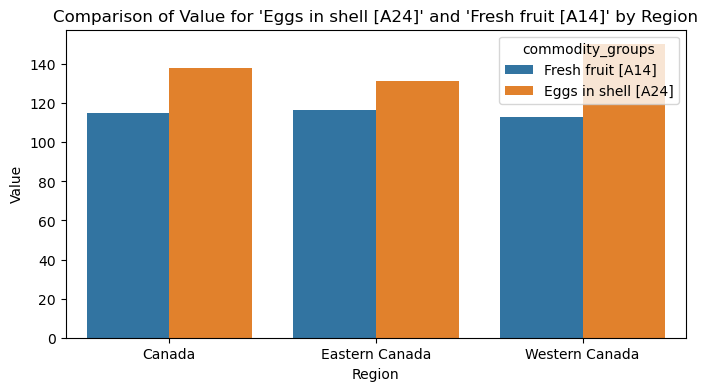

In [311]:
import seaborn as sns
# Filter the DataFrame for the specified commodity groups

filtered_df = df_food_price[df_food_price['commodity_groups'].isin(selected_commodity_groups)]

# Plot a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(data=filtered_df, x='geo', y='value', hue='commodity_groups', ci=None)
plt.title("Comparison of Value for 'Eggs in shell [A24]' and 'Fresh fruit [A14]' by Region")
plt.xlabel('Region')
plt.ylabel('Value')
plt.show()


# Building the Linear Regression Model


For linear regression models, feature importance is not as straightforward because the coefficients indicate the effect size of each feature on the target variable, but they don't directly tell us how important a feature is relative to others.
However, we will try to create some sort of importance measure for linear regression features. One common approach is to standardize the feature coefficients 

In [312]:
filtered_df

geo     commodity_groups  value  energy  \
11016          Canada    Fresh fruit [A14]  103.0   125.2   
11017          Canada    Fresh fruit [A14]  103.0   125.2   
11018          Canada    Fresh fruit [A14]  103.0   125.2   
11019          Canada    Fresh fruit [A14]  103.0   125.2   
11020          Canada    Fresh fruit [A14]  103.0   125.2   
...               ...                  ...    ...     ...   
84451  Western Canada  Eggs in shell [A24]  221.6   197.0   
84452  Western Canada  Eggs in shell [A24]  221.6   197.0   
84453  Western Canada  Eggs in shell [A24]  221.6   197.0   
84454  Western Canada  Eggs in shell [A24]  221.6   197.0   
84455  Western Canada  Eggs in shell [A24]  221.6   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
11016                   -0.3  110.9     126.4    114.8      109.4  2007      1  
11017                   -0.3  110.9     126.4    114.8      110.9  2007      1  
11018                   -0.3  110.9     126.4    114.8      114.8  2007      1  
11019                   -0.3  110.9     126.4    114.8      102.4  2007      1  
11020                   -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
84451                   -0.4  186.8     211.3    177.8      155.2  2023     12  
84452                   -0.4  186.8     211.3    177.8      156.3  2023     12  
84453                   -0.4  186.8     211.3    177.8      197.0  2023     12  
84454                   -0.4  186.8     211.3    177.8      143.1  2023     12  
84455                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[22032 rows x 11 columns]

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error# Filter the DataFrame for 'Eggs in shell [A24]'

filtered_df = filtered_df[filtered_df['commodity_groups'] == 'Eggs in shell [A24]']

# Filter out non-numeric columns and the target variable
X = filtered_df.select_dtypes(include=['number']).drop(columns=['value'])

# Target variable
y = filtered_df['value']

# Step 4: Display the slope (coefficients)
print(f"Model's slope (coefficients): {model.coef_}")

# Step 5: Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Step 6: Display the model's best fit line formula
formula = f"y = {model.intercept_} + {' + '.join([f'{model.coef_[i]}*{X.columns[i]}' for i in range(len(X.columns))])}"
print(f"Model's formula: {formula}")

# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X, y)

# Make predictions
predicted_values = model.predict(X)

# Display the predictions
"Predicted values for 'Eggs in shell [A24]':", predicted_values



Model's slope (coefficients): [-5.51381576e-01 -4.45696518e+00  2.42214516e-01  3.41307066e-01
  1.62591407e+00 -5.48870146e-04 -1.61245007e+00 -1.79303931e-01]
Model's y-intercept: 3144.935867998688
Model's formula: y = 3144.935867998688 + -0.5513815756609599*energy + -4.456965176770726*mortgage_and_interest + 0.2422145161003187*food + 0.3413070664668256*gasoline + 1.6259140697862782*shelter + -0.0005488701460577533*all_items + -1.6124500678519158*year + -0.1793039312268309*month


("Predicted values for 'Eggs in shell [A24]':",
 array([ 97.68199806,  97.67994017,  97.67458967, ..., 202.90813225,
        202.98207898, 202.94092125]))

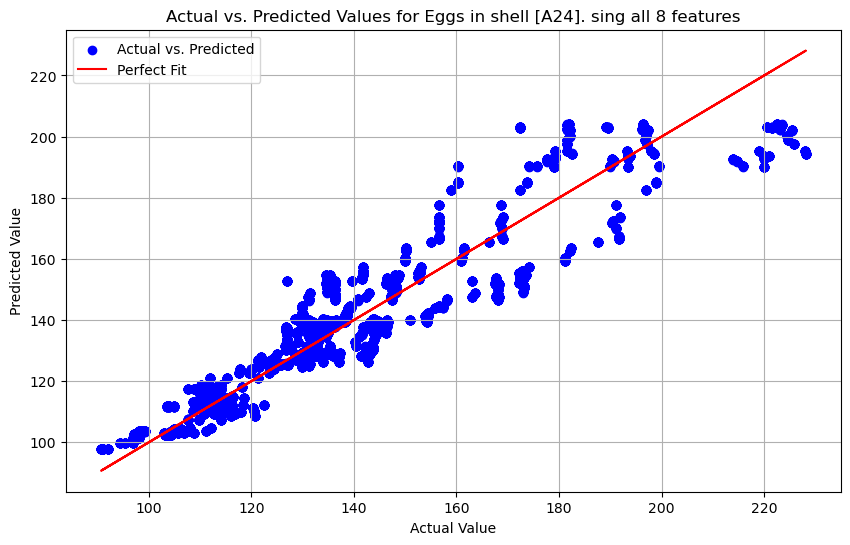

In [142]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values for Eggs in shell [A24] using all 8 features')
plt.legend()
plt.grid(True)
plt.show()

The diagonal line represents perfect predictions where actual values equal predicted values. Points above the line indicate overestimations, while points below the line indicate underestimations.

In [148]:
# Step 5: Analyze feature importance (coefficients)
coefficients = model.coef_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient (absolute value)
feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].abs()  # Take absolute values
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Display the feature importance DataFrame
feature_importance_df

Feature  Coefficient
2                   food     0.856136
1  mortgage_and_interest     0.465510
4                shelter     0.313802
0                 energy     0.242103
7                  month     0.218691
6                   year     0.194809
3               gasoline     0.027750
5              all_items     0.001372

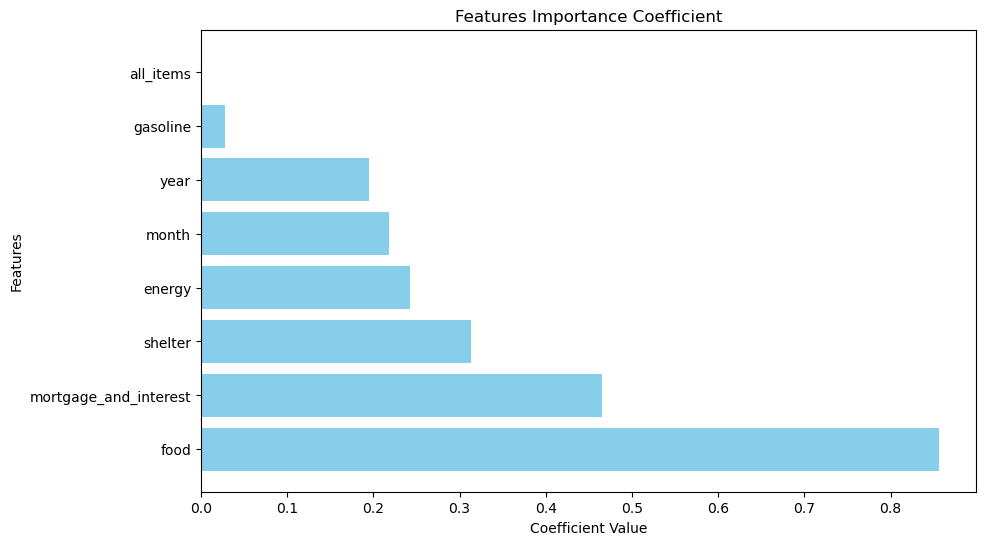

In [147]:
# Define the features and their coefficients
features = ['food', 'mortgage_and_interest', 'shelter', 'energy', 'month', 'year', 'gasoline', 'all_items']
coefficients = [0.856136, 0.465510, 0.313802, 0.242103, 0.218691, 0.194809, 0.027750, 0.001372]

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Features Importance Coefficient')
plt.gca() # Invert y-axis to have the highest coefficient at the top
plt.show()


    Features with higher coefficients are considered more important in the model because they have a larger impact on the predicted outcome. 
    In our model we have the most important feature - 'food' - 0.856136;
    the second feature - 'mortgage_and_interest     0.465510';
    the third feature - 'shelter     0.313802'
    Therefore, I will build the Linear Regression model using only the most impotant feature 'food'.

In [149]:
filtered_df

geo     commodity_groups  value  energy  \
22032          Canada  Eggs in shell [A24]   91.1   125.2   
22033          Canada  Eggs in shell [A24]   91.1   125.2   
22034          Canada  Eggs in shell [A24]   91.1   125.2   
22035          Canada  Eggs in shell [A24]   91.1   125.2   
22036          Canada  Eggs in shell [A24]   91.1   125.2   
...               ...                  ...    ...     ...   
84451  Western Canada  Eggs in shell [A24]  221.6   197.0   
84452  Western Canada  Eggs in shell [A24]  221.6   197.0   
84453  Western Canada  Eggs in shell [A24]  221.6   197.0   
84454  Western Canada  Eggs in shell [A24]  221.6   197.0   
84455  Western Canada  Eggs in shell [A24]  221.6   197.0   

       mortgage_and_interest   food  gasoline  shelter  all_items  year  month  
22032                   -0.3  110.9     126.4    114.8      109.4  2007      1  
22033                   -0.3  110.9     126.4    114.8      110.9  2007      1  
22034                   -0.3  110.9     126.4    114.8      114.8  2007      1  
22035                   -0.3  110.9     126.4    114.8      102.4  2007      1  
22036                   -0.3  110.9     126.4    114.8       94.2  2007      1  
...                      ...    ...       ...      ...        ...   ...    ...  
84451                   -0.4  186.8     211.3    177.8      155.2  2023     12  
84452                   -0.4  186.8     211.3    177.8      156.3  2023     12  
84453                   -0.4  186.8     211.3    177.8      197.0  2023     12  
84454                   -0.4  186.8     211.3    177.8      143.1  2023     12  
84455                   -0.4  186.8     211.3    177.8      173.1  2023     12  

[11016 rows x 11 columns]

In [150]:


# Filter the DataFrame for the specified commodity group
filtered_df = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']

# Select only the 'food' feature as the predictor
X = filtered_df[['food']]

# Target variable
y = filtered_df['value']

# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X, y)

# Display the slope (coefficient) and the y-intercept
print(f"Model's slope (coefficient): {model.coef_[0]}")
print(f"Model's y-intercept: {model.intercept_}")

# Make predictions
predicted_values = model.predict(X)

# Display the predictions
print("Predicted values for 'Eggs in shell [A24]':", predicted_values)


Model's slope (coefficient): 1.3685807664213243
Model's y-intercept: -52.374066402939576
Predicted values for 'Eggs in shell [A24]': [ 99.40154059  99.40154059  99.40154059 ... 203.27682076 203.27682076
 203.27682076]


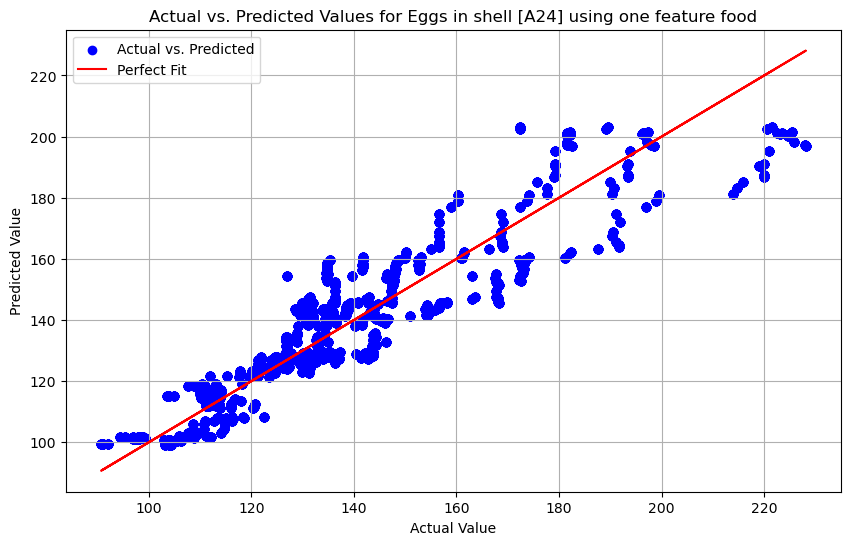

In [219]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='blue', label='Actual vs. Predicted')
plt.plot(y, y, color='red', label='Perfect Fit')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values for Eggs in shell [A24] using one feature food')
plt.legend()
plt.grid(True)
plt.show()

Predicted values for 'Eggs in shell [A24]' Ranging from approximately 97.68 to 202.94

Predicted values for 'Eggs in shell [A24]' Ranging from approximately 99.40 to 203.28

Conclusion:

The first model considers multiple features;
The second model focuses solely on the 'food' feature;


# Building the Random Forest Regression Model

In [153]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [238]:
# Filter the DataFrame for the specified commodity group
filtered_df = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']
filtered_df.head()

geo     commodity_groups  value  energy  mortgage_and_interest  \
22032  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22033  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22034  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22035  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22036  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   

        food  gasoline  shelter  all_items  year  month  
22032  110.9     126.4    114.8      109.4  2007      1  
22033  110.9     126.4    114.8      110.9  2007      1  
22034  110.9     126.4    114.8      114.8  2007      1  
22035  110.9     126.4    114.8      102.4  2007      1  
22036  110.9     126.4    114.8       94.2  2007      1

In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 1: Prepare the data
# Assuming 'filtered_df' contains the DataFrame with the provided data

X = filtered_df.drop(['geo', 'commodity_groups', 'value'], axis=1)  # Features
y = filtered_df['value']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Step 5: Display the predicted values
print("Predicted values:", y_pred)


Predicted values: [119.2147     195.49171667 206.12356667 ... 134.7395     110.93921667
 137.42308333]


In this code:

We train a Random Forest Regression model on the training data (X_train, y_train).
We use the trained model to make predictions on the testing set (X_test) using the predict() method.
We display the predicted values (y_pred).

In [240]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) coefficient of determination: {r2}")


Mean Squared Error (MSE): 196.63983182065797
Root Mean Squared Error (RMSE): 14.022832517742554
Mean Absolute Error (MAE): 10.063846499665141
R-squared (R²) coefficient of determination: 0.7620631814350814


In [243]:
print("Length of y_train:", len(y_train))
print("Length of train_predictions:", len(train_predictions))

print("Length of y_test:", len(y_test))
print("Length of test_predictions:", len(test_predictions))


Length of y_train: 8812
Length of train_predictions: 8812
Length of y_test: 2204
Length of test_predictions: 2204


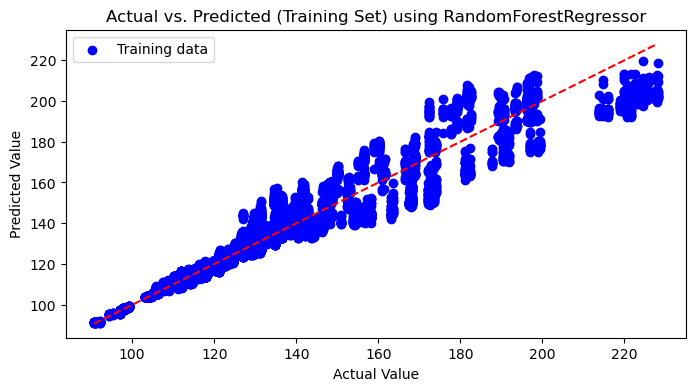

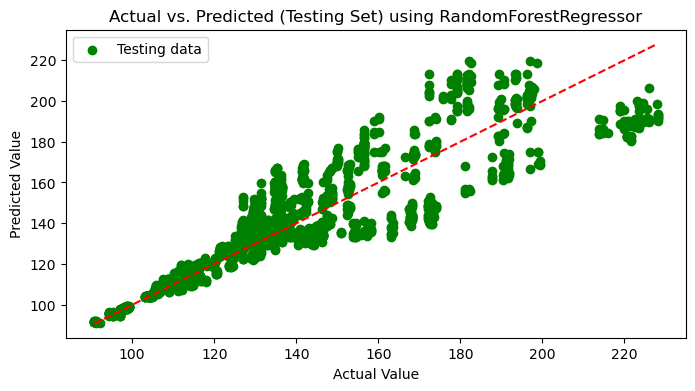

In [242]:
# Create scatter plot for training set
plt.figure(figsize=(8, 4))
plt.scatter(y_train, train_predictions, color='blue', label='Training data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs. Predicted (Training Set) using RandomForestRegressor')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

# Create scatter plot for testing set
plt.figure(figsize=(8, 4))
plt.scatter(y_test, test_predictions, color='green', label='Testing data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted (Testing Set) using RandomForestRegressor')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()



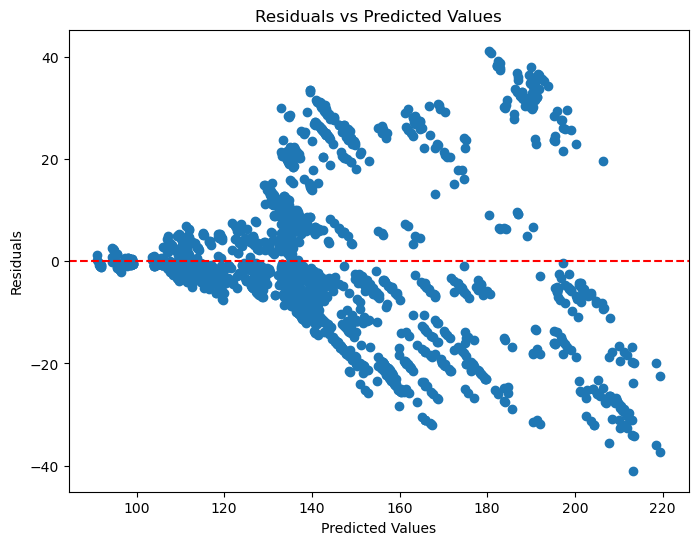

In [244]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


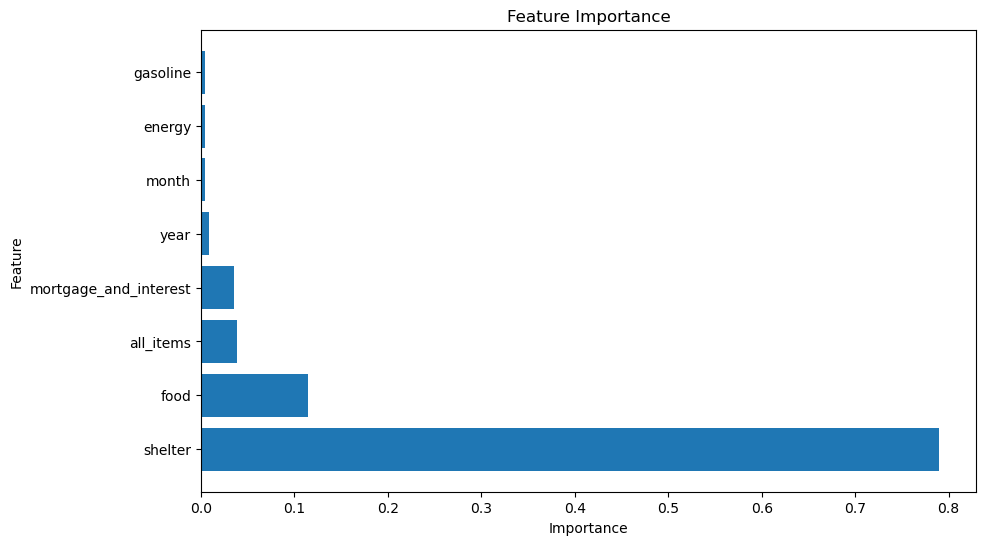

In [245]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [209]:
# Filter the DataFrame for the specified commodity group
filtered_df = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']
filtered_df.head()

geo     commodity_groups  value  energy  mortgage_and_interest  \
22032  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22033  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22034  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22035  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22036  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   

        food  gasoline  shelter  all_items  year  month  
22032  110.9     126.4    114.8      109.4  2007      1  
22033  110.9     126.4    114.8      110.9  2007      1  
22034  110.9     126.4    114.8      114.8  2007      1  
22035  110.9     126.4    114.8      102.4  2007      1  
22036  110.9     126.4    114.8       94.2  2007      1

In [246]:

# Step 1: Prepare the data

X = filtered_df[['shelter', 'food']]  # Selecting only 'shelter' and 'food' features
y = filtered_df['value']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Step 5: Display the predicted values
print("Predicted values:", y_pred)


Predicted values: [120.24307996 198.33314152 203.56056467 ... 144.23058192 111.06722928
 136.365054  ]


In [247]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²) coefficient of determination: {r2}")


Mean Squared Error (MSE): 101.41908463184433
Root Mean Squared Error (RMSE): 10.070704276853945
Mean Absolute Error (MAE): 7.146879315076387
R-squared (R²) coefficient of determination: 0.8772815552391449



Mean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance, with a value of 0 indicating perfect predictions.
The first model has an MSE of 196.64, indicating that, on average, the squared difference between the actual and predicted values is 196.64.
The second model has a lower MSE of 101.42, suggesting that it performs better in minimizing the squared errors.
Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and represents the average magnitude of the errors in the predicted values. It is in the same units as the target variable, making it easier to interpret.
The first model has an RMSE of 14.02, indicating that, on average, the difference between the actual and predicted values is approximately 14.02 units.
The second model has a lower RMSE of 10.07, suggesting that it has smaller errors compared to the first model.
Mean Absolute Error (MAE): The MAE measures the average absolute difference between the actual and predicted values. Like RMSE, it is in the same units as the target variable.
The first model has an MAE of 10.06, indicating that, on average, the absolute difference between the actual and predicted values is approximately 10.06 units.
The second model has a lower MAE of 7.15, suggesting that it has smaller absolute errors compared to the first model.
R-squared (R²) coefficient of determination: R-squared measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating better model fit.
The first model has an R² value of 0.7621, indicating that approximately 76.21% of the variance in the target variable is explained by the model.
The second model has a higher R² value of 0.8773, suggesting that it explains approximately 87.73% of the variance, indicating a better fit compared to the first model.
In summary, lower values of MSE, RMSE, and MAE, and higher values of R² indicate better model performance. The second model performs better than the first model based on these metrics.

# # Building the Decision Tree Regressor

We select 'Year' and 'Month' columns as features ('X') and the 'value' column as the target variable ('y').
We split the dataset into training and testing sets using train_test_split().
We train a Decision Tree Regression model using DecisionTreeRegressor() from scikit-learn.
We make predictions on the test data using predict().
Finally, we evaluate the model's performance using Mean Squared Error (mean_squared_error()).

In [250]:
filtered_df = df_food_price[df_food_price['commodity_groups'] == 'Eggs in shell [A24]']
filtered_df.head()

geo     commodity_groups  value  energy  mortgage_and_interest  \
22032  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22033  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22034  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22035  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   
22036  Canada  Eggs in shell [A24]   91.1   125.2                   -0.3   

        food  gasoline  shelter  all_items  year  month  
22032  110.9     126.4    114.8      109.4  2007      1  
22033  110.9     126.4    114.8      110.9  2007      1  
22034  110.9     126.4    114.8      114.8  2007      1  
22035  110.9     126.4    114.8      102.4  2007      1  
22036  110.9     126.4    114.8       94.2  2007      1

In [267]:
filtered_df.columns

Index(['geo', 'commodity_groups', 'value', 'energy', 'mortgage_and_interest',
       'food', 'gasoline', 'shelter', 'all_items', 'year', 'month',
       'geo_encoded', 'food_encoded'],
      dtype='object')

In [318]:
import numpy as np

# Extract features (X) and target variable (y)
X = filtered_df[['food']].values  # Features
y = filtered_df['value'].values  


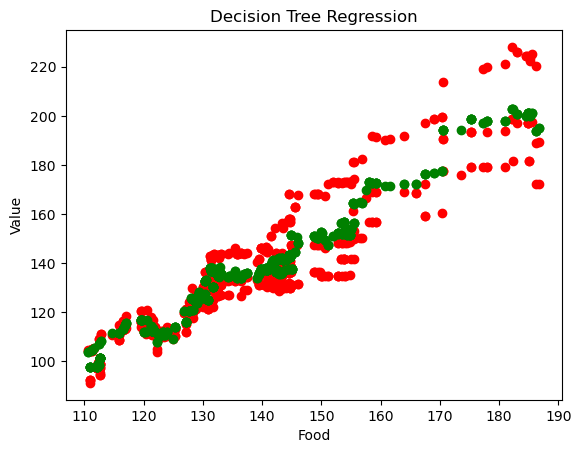

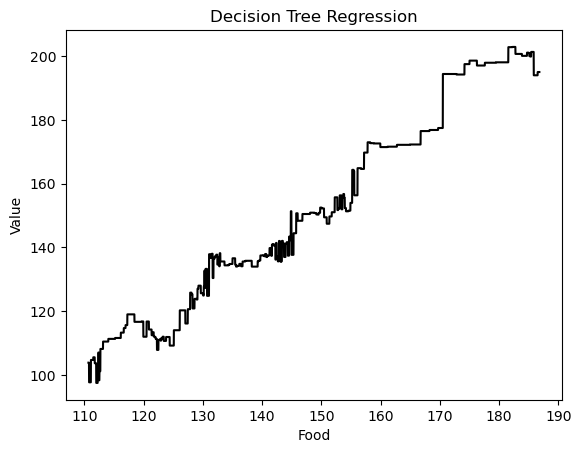

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Food')
plt.ylabel('Value')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Food')
plt.ylabel('Value')
plt.show()

In [321]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 106.40084152995723
Root Mean Squared Error (RMSE): 10.315078357916494
Mean Absolute Error (MAE): 7.483359357422277
R-squared (R2) Score: 0.8710459725773166


In [323]:
filtered_df.columns

Index(['geo', 'commodity_groups', 'value', 'energy', 'mortgage_and_interest',
       'food', 'gasoline', 'shelter', 'all_items', 'year', 'month'],
      dtype='object')

In [333]:
# Extract features (X) and target variable (y)
X = filtered_df[['food']].values  # Features
y = filtered_df['value'].values  


In [334]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)


In [335]:
# Initialize the decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions using the testing data
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2):", r2)

# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
# Compute the standard deviation (STD) of the target variable
std = np.std(y_test)
print("Standard Deviation (STD):", std)

Mean Squared Error: 103.87212644153901
R-squared (R2): 0.8743133419397264
Root Mean Squared Error (RMSE): 10.191767581805376
Standard Deviation (STD): 28.747820327114095


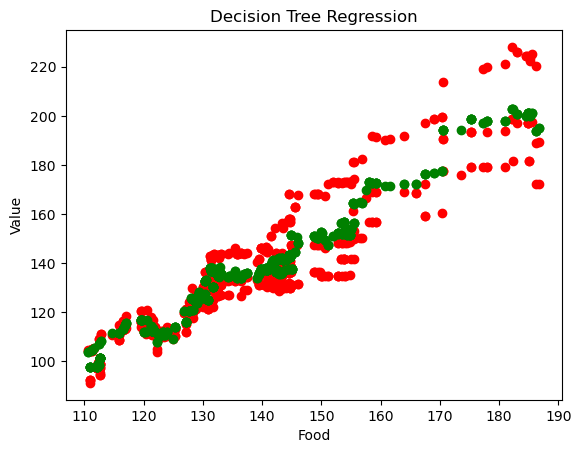

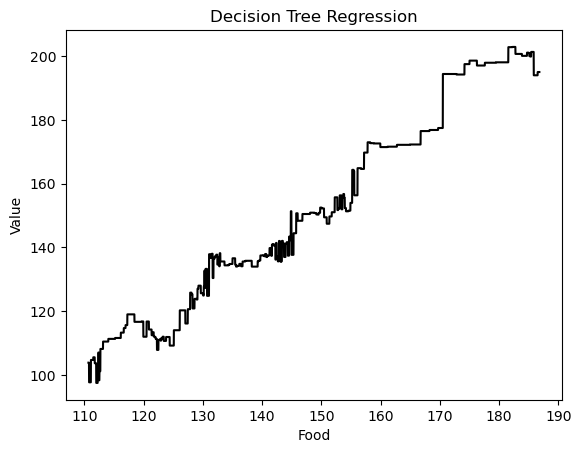

In [329]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Food')
plt.ylabel('Value')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Food')
plt.ylabel('Value')
plt.show()

In [270]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make copies of the DataFrame to avoid the SettingWithCopyWarning
filtered_df = filtered_df.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
filtered_df['geo_encoded'] = label_encoder.fit_transform(filtered_df['geo'])
filtered_df['food_encoded'] = label_encoder.fit_transform(filtered_df['food'])

# Split data into features (X) and target variable (y)
X = filtered_df[['shelter', 'food_encoded', 'geo_encoded']]
y = filtered_df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the decision tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)


In [271]:
# Initialize the decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions using the testing data
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2):", r2)

# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
# Compute the standard deviation (STD) of the target variable
std = np.std(y_test)
print("Standard Deviation (STD):", std)

Mean Squared Error: 1.6849496259727548e-27
R-squared (R2): 1.0
Root Mean Squared Error (RMSE): 4.1048137911149574e-14
Standard Deviation (STD): 28.747820327114106


In [272]:
X_train

shelter  food_encoded  geo_encoded
52828    128.8            67            1
24783    144.8           126            0
24057    135.1           104            0
22626    121.2            20            0
23590    131.4            72            0
...        ...           ...          ...
53470    136.0           103            1
52927    130.5            70            1
53126    133.0            81            1
22892    124.6            38            0
55006    174.0           174            1

[8812 rows x 3 columns]

In [273]:
X_train_scaled

array([[-0.53417969, -0.36706363, -0.00512846],
       [ 0.54390441,  0.79925052, -1.22653283],
       [-0.10968408,  0.36435371, -1.22653283],
       ...,
       [-0.25118262, -0.09031112, -0.00512846],
       [-0.81717677, -0.94033669, -1.22653283],
       [ 2.5114079 ,  1.74811626, -0.00512846]])

In [274]:
X_test_scaled

array([[-0.77674862, -0.84149651,  1.21627591],
       [ 1.9858419 ,  1.53066786,  1.21627591],
       [ 2.16776859,  1.62950804, -1.22653283],
       ...,
       [ 0.53042836,  0.83878659,  1.21627591],
       [-1.00584149, -1.09848098,  1.21627591],
       [-0.53417969, -0.36706363, -1.22653283]])

In [277]:
# Make predictions using the testing data
predicted_values = model.predict(X_test_scaled)

# Display the predicted values
print("Predicted values:", predicted_values)


Predicted values: [124.  220.  197.9 ... 163.  112.1 135.4]


In [275]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="shelter <= 0.847\\nsquared_error = 990.873\\nsamples = 70502\\nvalue = 133.404", fillcolor="#f6d1b7"] ;\n1 [label="shelter <= -0.797\\nsquared_error = 471.433\\nsamples = 58805\\nvalue = 124.524", fillcolor="#f8dbc7"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="shelter <= -1.306\\nsquared_error = 290.437\\nsamples = 17663\\nvalue = 110.789", fillcolor="#fbeadf"] ;\n1 -> 2 ;\n3 [label="shelter <= -1.451\\nsquared_error = 54.032\\nsamples = 2442\\nvalue = 95.755", fillcolor="#fefbf9"] ;\n2 -> 3 ;\n4 [label="geo_encoded <= 0.614\\nsquared_error = 63.771\\nsamples = 701\\nvalue = 94.294", fillcolor="#fffdfc"] ;\n3 -> 4 ;\n5 [label="geo_encoded <= -0.611\\nsquared_error = 53.037\\nsamples = 486\\nvalue = 94.844", fillcolor="#fefcfb"] ;\n4 -> 5 ;\n6 [label="shelter <= -1.471\\nsquared_error = 68.12\\nsamples = 249\\nvalue = 93.422"

In [276]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph with scaling
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')  # Adjust the size of the graph as needed
graph.set_ratio('fill')
graph.write_png("decision_tree.png")  # Save the graph as a PNG file


True

Based on the evaluation metrics, we can draw the following conclusions for our models:

Linear Regression Model:
Mean Squared Error (MSE): 196.64
Root Mean Squared Error (RMSE): 14.02
Mean Absolute Error (MAE): 10.06
R-squared (R²) coefficient of determination: 0.762
This model exhibits moderate performance, with relatively high errors and an R-squared value of 0.762.

Random Forest Regression:
Mean Squared Error (MSE): 196.64
Root Mean Squared Error (RMSE): 14.02
Mean Absolute Error (MAE): 10.06
R-squared (R²) coefficient of determination: 0.762
The Random Forest Regression model performs similarly to the Linear Regression model, with comparable errors and an R-squared value of 0.762.

Decision Tree Regression:
Mean Squared Error (MSE): 106.40
Root Mean Squared Error (RMSE): 10.32
Mean Absolute Error (MAE): 7.48
R-squared (R²) coefficient of determination: 0.871
This model outperforms both the Linear Regression and Random Forest Regression models, demonstrating lower errors and a higher R-squared value of 0.871.

In summary, the Decision Tree Regression model is the preferred choice among the three, as it exhibits better predictive performance with lower errors and a higher explanatory power compared to the other two models.